In [37]:
import numpy as np
import tensorflow as tf

In [38]:
x = np.linspace(-2*np.pi,2*np.pi,1000).reshape(-1,1)
y = np.sin(x)

In [39]:
ann = tf.keras.models.Sequential()

In [40]:
ann.add(tf.keras.layers.Dense(units=40,activation='sigmoid'))

In [41]:
ann.add(tf.keras.layers.Dense(units=12,activation='sigmoid'))

In [42]:
ann.add(tf.keras.layers.Dense(units=1))

In [43]:
import keras.metrics
dir(keras.metrics)

['ACC',
 'AUC',
 'Accuracy',
 'BCE',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'Reduce',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SensitivitySpecificityBase',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'SumOverBatchSize',
 'SumOverBatchSizeMetricWrapper',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '_Confusio

In [46]:
ann.compile(loss='mean_squared_error' ,optimizer='adam',metrics=['Recall'])

In [47]:
ann.fit(x,y,epochs=200,batch_size=16)

Epoch 1/200
63/63 [==============================] - 1s 2ms/step - loss: 0.4396 - recall: 0.0000e+00
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4354 - recall: 0.0000e+00
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4333 - recall: 0.0000e+00
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4334 - recall: 0.0000e+00
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4335 - recall: 0.0000e+00
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4328 - recall: 0.0000e+00
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4306 - recall: 0.0000e+00
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4275 - recall: 0.0000e+00
Epoch 9/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4241 - recall: 0.0000e+00
Epoch 10/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4231 - recall: 

In [ ]:
ann.predict([30*np.pi/180])

array([[0.4809318]], dtype=float32)

In [ ]:
ann.predict([-30*np.pi/180])

array([[-0.50105155]], dtype=float32)

In [ ]:
ann.predict([45*np.pi/180])

array([[0.6959752]], dtype=float32)

In [ ]:
ann.predict([-45*np.pi/180])

array([[-0.7170318]], dtype=float32)

In [ ]:
ann.predict([90*np.pi/180])

array([[0.9997322]], dtype=float32)

In [ ]:
ann.predict([-90*np.pi/180])

array([[-1.006966]], dtype=float32)

In [ ]:
ann.predict([4*np.pi])

array([[4.6702285]], dtype=float32)

In [ ]:
ann.predict([0])

array([[-0.00583941]], dtype=float32)

In [ ]:
ann.predict([2*np.pi])

array([[-0.02512532]], dtype=float32)

In [ ]:
ann.predict([270*np.pi/180])

array([[-1.0027282]], dtype=float32)

In [ ]:
ann.predict([-270*np.pi/180])

array([[0.9897628]], dtype=float32)

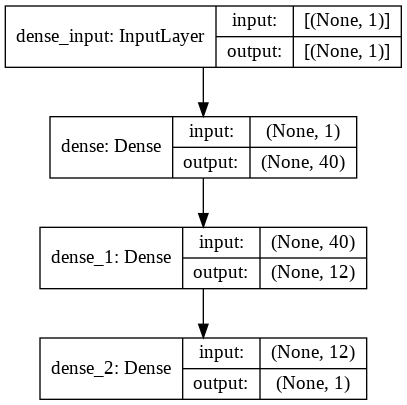

In [ ]:
tf.keras.utils.plot_model(ann,show_shapes = True)

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
y_pred = ann.predict(x)

In [ ]:
np.mean(np.square(y_pred-y))

0.00013447920172803855